## Visibilities for a point source

In [1]:
%load_ext autoreload
import sys
sys.path.append("../")
import numpy as np
import imcurio as imc
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
%autoreload
B = imc.SimBox("../sims/HImesh_0512_z100.fits")

Box size: 32.81-20.88 deg from z=0.72-1.33


In [3]:
## Let's put a source with unit flux at offset_x and offfset_y in degress
theta = 0.02
phi = 0.5
offset_x_rad = theta*np.cos(phi) 
offset_y_rad = theta*np.sin(phi) 
offset_xi = np.rint(offset_x_rad/B.Dpix_rad).astype(int)
offset_yi = np.rint(offset_y_rad/B.Dpix_rad).astype(int)

## now put this source in
B.box *= 0.0 ## set all pixels to zero
Bs = deepcopy(B)
Bs.box[offset_xi,offset_yi,np.arange(B.Nz)]=1  ##except our point source
Sc = imc.SourceCat(np.array([[theta,phi,1]]))

In [15]:
%autoreload
T=imc.TelSim()
visPS = T.get_visibilities(Bs, None, vopts={'interpolation':'lasz'})
visPSlin = T.get_visibilities(Bs, None, vopts={'interpolation':'lin'})

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 
Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 


In [5]:
%autoreload
visDI = T.get_visibilities(B, Sc)

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 


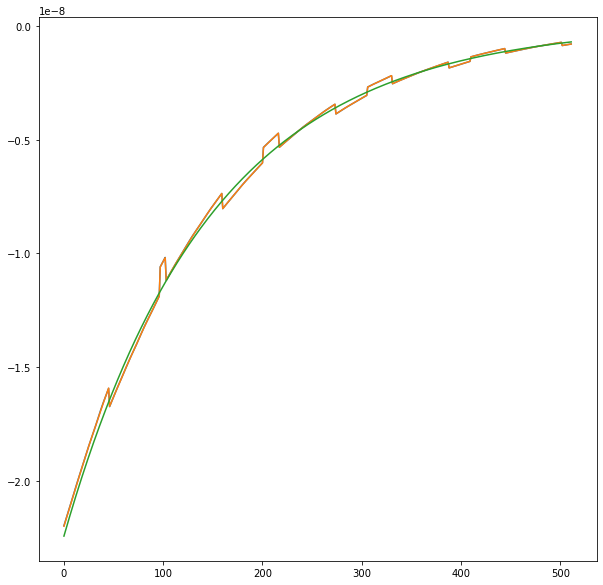

In [42]:
plt.figure(figsize=(10,10))
plt.plot(np.real(visPS[:,10]))
plt.plot(np.real(visPSlin[:,10]))
plt.plot(np.real(visDI[:,10]))

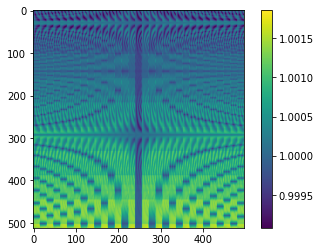

In [31]:
plt.imshow(np.real(visPS/visPSlin))
plt.colorbar()

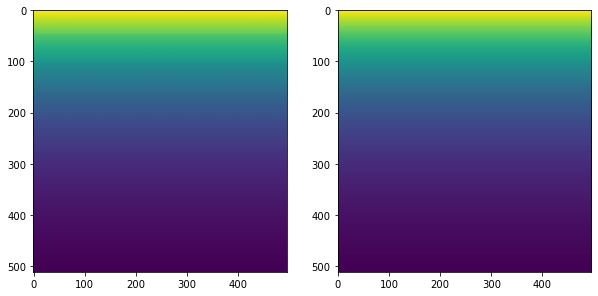

In [40]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(np.abs(visPS))
plt.subplot(1,2,2)
plt.imshow(np.abs(visDI))